In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\sathish kumar\Downloads\titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data=data.drop(["Cabin","Name","Ticket"],axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [10]:
data=data.dropna(axis=0,how="any")
data.shape

(712, 9)

In [11]:
data["Embarked"]=data["Embarked"].map({"S":0,"C":1,"Q":2}).astype(int)
data["Sex"]=data["Sex"].map({"male":0,"female":1}).astype(int)

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567251,0.261236
std,258.683191,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.521561
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645850,0.000000
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [13]:
data.groupby('Survived').size()

Survived
0    424
1    288
dtype: int64

In [14]:
corr=data.corr()
corr.nlargest(9,'Survived')['Survived']

Survived       1.000000
Sex            0.536762
Fare           0.266100
Embarked       0.108517
Parch          0.095265
PassengerId    0.029526
SibSp         -0.015523
Age           -0.082446
Pclass        -0.356462
Name: Survived, dtype: float64

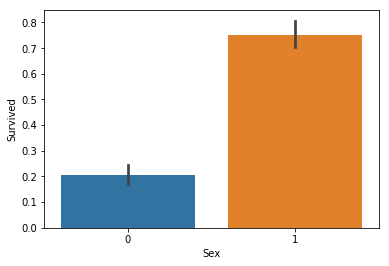

In [15]:
sns.barplot(x="Sex", y="Survived", data=data)

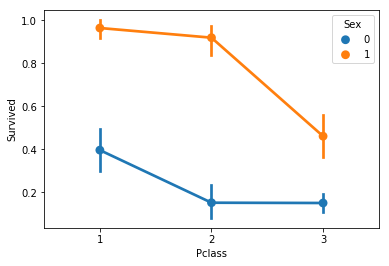

In [16]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data)

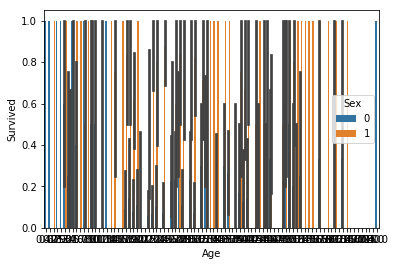

In [17]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data)

In [18]:
x=data.drop(["Survived"],axis=1)
x.head()
y=data["Survived"]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [20]:
x_train.shape

(498, 8)

In [21]:
y_train.shape

(498,)

In [22]:
x_test.shape

(214, 8)

In [23]:
y_test.shape

(214,)

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None)

In [25]:
y_pred1= gnb.predict(x_test)
y_pred1

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
test_score=accuracy_score(y_pred1,y_test)
print('Accuracy on the testing subset: {:.3f}'.format(test_score))
train_score=gnb.score(x_train,y_train)
print('Accuracy on the training subset: {:.3f}'.format(train_score))

Accuracy on the testing subset: 0.790
Accuracy on the training subset: 0.781


In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})  
df.head()

,Actual,Predicted
689,1,1
279,1,1
508,0,0
9,1,1
496,1,1


In [28]:
cm = confusion_matrix(y_test,y_pred1)
print(cm)

[[104  22]
 [ 23  65]]


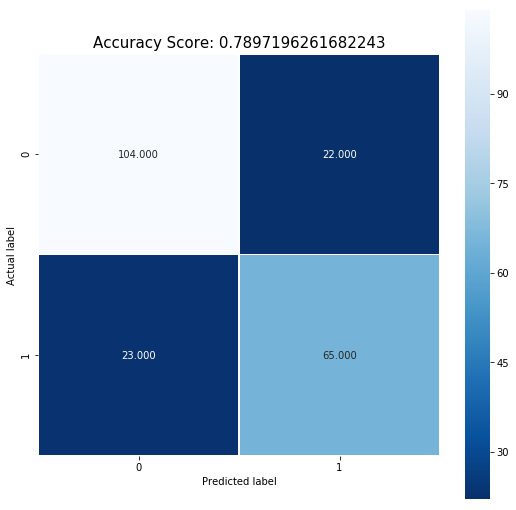

In [29]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(test_score)
plt.title(title, size = 15);

In [30]:
print("Classification Report")
clr=classification_report(y_test, y_pred1, labels=[1, 0])
print(clr)

Classification Report
             precision    recall  f1-score   support

          1       0.75      0.74      0.74        88
          0       0.82      0.83      0.82       126

avg / total       0.79      0.79      0.79       214



In [31]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
y_pred2= mnb.predict(x_test)
y_pred2

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
test_score=accuracy_score(y_pred2,y_test)
print('Accuracy on the testing subset: {:.3f}'.format(test_score))
train_score=mnb.score(x_train,y_train)
print('Accuracy on the training subset: {:.3f}'.format(train_score))

Accuracy on the testing subset: 0.640
Accuracy on the training subset: 0.673


In [34]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})  
df.head()

,Actual,Predicted
689,1,1
279,1,0
508,0,0
9,1,1
496,1,1


In [35]:
cm = confusion_matrix(y_test,y_pred2)
print(cm)

[[99 27]
 [50 38]]


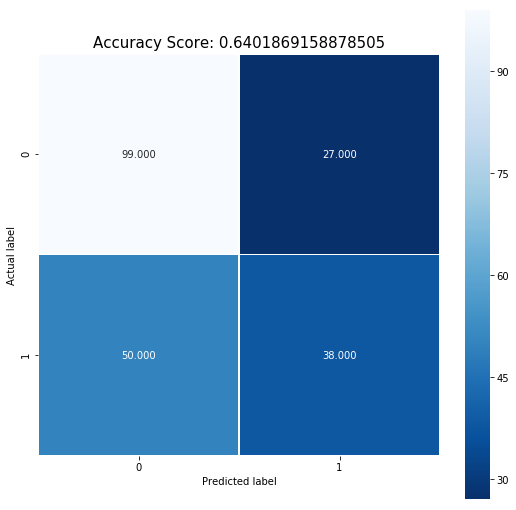

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(test_score)
plt.title(title, size = 15);

In [37]:
print("Classification Report")
clr=classification_report(y_test, y_pred2, labels=[1, 0])
print(clr)

Classification Report
             precision    recall  f1-score   support

          1       0.58      0.43      0.50        88
          0       0.66      0.79      0.72       126

avg / total       0.63      0.64      0.63       214



In [38]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=0.3)
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.3, class_prior=None, fit_prior=True)

In [39]:
y_pred3= bnb.predict(x_test)
y_pred3

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
test_score=accuracy_score(y_pred3,y_test)
print('Accuracy on the testing subset: {:.3f}'.format(test_score))
train_score=gnb.score(x_train,y_train)
print('Accuracy on the training subset: {:.3f}'.format(train_score))

Accuracy on the testing subset: 0.776
Accuracy on the training subset: 0.781


In [41]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})  
df.head()

,Actual,Predicted
689,1,1
279,1,1
508,0,0
9,1,1
496,1,1


In [42]:
cm = confusion_matrix(y_test,y_pred3)
print(cm)

[[102  24]
 [ 24  64]]


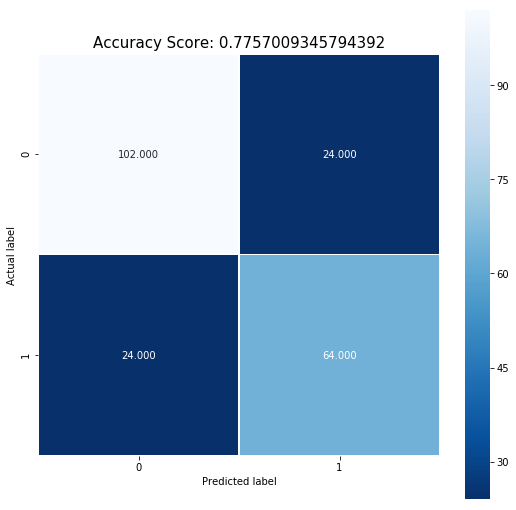

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(test_score)
plt.title(title, size = 15);

In [44]:
print("Classification Report")
clr=classification_report(y_test, y_pred3, labels=[1, 0])
print(clr)

Classification Report
             precision    recall  f1-score   support

          1       0.73      0.73      0.73        88
          0       0.81      0.81      0.81       126

avg / total       0.78      0.78      0.78       214

